# "Crime Pattern Prediction in Chicago: A Machine Learning Approach"

## Student: Mukesh A P
## University College of Engineering, Tindivanam

In [2]:
! pip install pandas numpy seaborn matplotlib

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/nm_data/US_Crime_Data_10105Rows.csv')

# Data Preparation: Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Green color palette
green_palette = sns.color_palette("Greens")


In [5]:
data = df
data.head(5)

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,...,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location
0,12262588,JE104819,12/31/20 23:59,017XX N CICERO AVE,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,37.0,25.0,06,1144138.0,1910955.0,2020,1/8/21 15:39,41.911684,-87.745918,POINT (-87.745917518 41.9116839)
1,12258658,JE100080,12/31/20 23:51,013XX S HOMAN AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,24.0,29.0,04B,1153918.0,1893431.0,2020,1/7/21 15:41,41.863407,-87.710456,POINT (-87.710455868 41.863406877)
2,12258583,JE100003,12/31/20 23:45,080XX S ELLIS AVE,0420,BATTERY,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,APARTMENT,False,False,...,8.0,44.0,04B,NaN,NaN,2020,1/19/21 15:46,NaN,NaN,NaN
3,12274737,JE118886,12/31/20 23:45,001XX E WACKER DR,0810,THEFT,OVER $500,HOTEL / MOTEL,False,False,...,42.0,32.0,06,1177683.0,1902638.0,2020,1/23/21 15:39,41.888165,-87.622937,POINT (-87.622937212 41.888165132)
4,12263896,JE105660,12/31/20 23:45,049XX S FORRESTVILLE AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,4.0,38.0,06,1180760.0,1872402.0,2020,1/10/21 15:39,41.805125,-87.612569,POINT (-87.612569477 41.805125154)


In [6]:
data.tail()

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,...,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location
10099,12243734,JD457528,12/12/20 20:00,012XX S KOLIN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,...,24.0,29.0,08B,1147577.0,1894101.0,2020,12/19/20 15:40,41.865369,-87.733716,POINT (-87.733716227 41.865369326)
10100,12243945,JD457801,12/12/20 20:00,024XX E 77TH ST,0820,THEFT,$500 AND UNDER,STREET,False,False,...,7.0,43.0,06,1193713.0,1854381.0,2020,12/19/20 15:40,41.755366,-87.565654,POINT (-87.565654201 41.75536643)
10101,12294712,JE143864,12/12/20 20:00,054XX S OAK PARK AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,23.0,56.0,11,NaN,NaN,2020,2/18/21 15:40,NaN,NaN,NaN
10102,12243742,JD457551,12/12/20 19:52,021XX W FULLERTON AVE,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,GOVERNMENT BUILDING / PROPERTY,True,False,...,32.0,22.0,14,1161265.0,1915919.0,2020,12/19/20 15:40,41.924966,-87.682860,POINT (-87.682859686 41.924966354)
10103,12243650,JD457537,12/12/20 19:51,001XX E 79TH ST,1822,NARCOTICS,MANUFACTURE / DELIVER - CANNABIS OVER 10 GRAMS,STREET,True,False,...,6.0,69.0,18,1178630.0,1852665.0,2020,12/19/20 15:40,41.751014,-87.620981,POINT (-87.620980989 41.751013563)


##### Data Preparation and cleaning

* Load the file using pandas
* Look at some infromation about the data & the columns
* Fix any missing or incorrect values

In [7]:
data.columns

Index(['ID', 'Case_Number', 'Date', 'Block', 'IUCR', 'Primary_Type',
       'Description', 'Location_Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community_Area', 'FBI_Code', 'X_Coordinate',
       'Y_Coordinate', 'Year', 'Updated_On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [8]:
data.shape

(10104, 22)

In [9]:
data.describe()

,ID,Beat,District,Ward,Community_Area,X_Coordinate,Y_Coordinate,Year,Latitude,Longitude
count,1.010400e+04,10104.000000,10104.000000,10103.000000,10103.000000,9.604000e+03,9.604000e+03,10104.0,9604.000000,9604.000000
mean,1.221429e+07,1166.626089,11.440420,23.042265,37.721766,1.163884e+06,1.885422e+06,2020.0,41.841208,-87.674145
std,7.414356e+05,705.191690,7.050518,13.735650,21.842217,1.717693e+04,3.265140e+04,0.0,0.089809,0.062508
min,2.566600e+04,111.000000,1.000000,1.000000,1.000000,1.100207e+06,1.814351e+06,2020.0,41.645837,-87.906865
25%,1.224858e+07,612.000000,6.000000,10.000000,23.000000,1.151631e+06,1.857802e+06,2020.0,41.765090,-87.718774
50%,1.225281e+07,1024.000000,10.000000,23.000000,33.000000,1.165606e+06,1.889758e+06,2020.0,41.852989,-87.667555
75%,1.225690e+07,1713.000000,17.000000,34.000000,58.000000,1.176686e+06,1.910460e+06,2020.0,41.910073,-87.627465
max,1.375804e+07,2535.000000,25.000000,50.000000,77.000000,1.204790e+06,1.951493e+06,2020.0,42.022536,-87.525793


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10104 entries, 0 to 10103
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10104 non-null  int64  
 1   Case_Number           10104 non-null  object 
 2   Date                  10104 non-null  object 
 3   Block                 10104 non-null  object 
 4   IUCR                  10104 non-null  object 
 5   Primary_Type          10104 non-null  object 
 6   Description           10104 non-null  object 
 7   Location_Description  9969 non-null   object 
 8   Arrest                10104 non-null  bool   
 9   Domestic              10104 non-null  bool   
 10  Beat                  10104 non-null  int64  
 11  District              10104 non-null  int64  
 12  Ward                  10103 non-null  float64
 13  Community_Area        10103 non-null  float64
 14  FBI_Code              10104 non-null  object 
 15  X_Coordinate       

##### Checking Missing and Duplicate values

In [11]:
data.isnull().sum()

,0
ID,0
Case_Number,0
Date,0
Block,0
IUCR,0
Primary_Type,0
Description,0
Location_Description,135
Arrest,0
Domestic,0


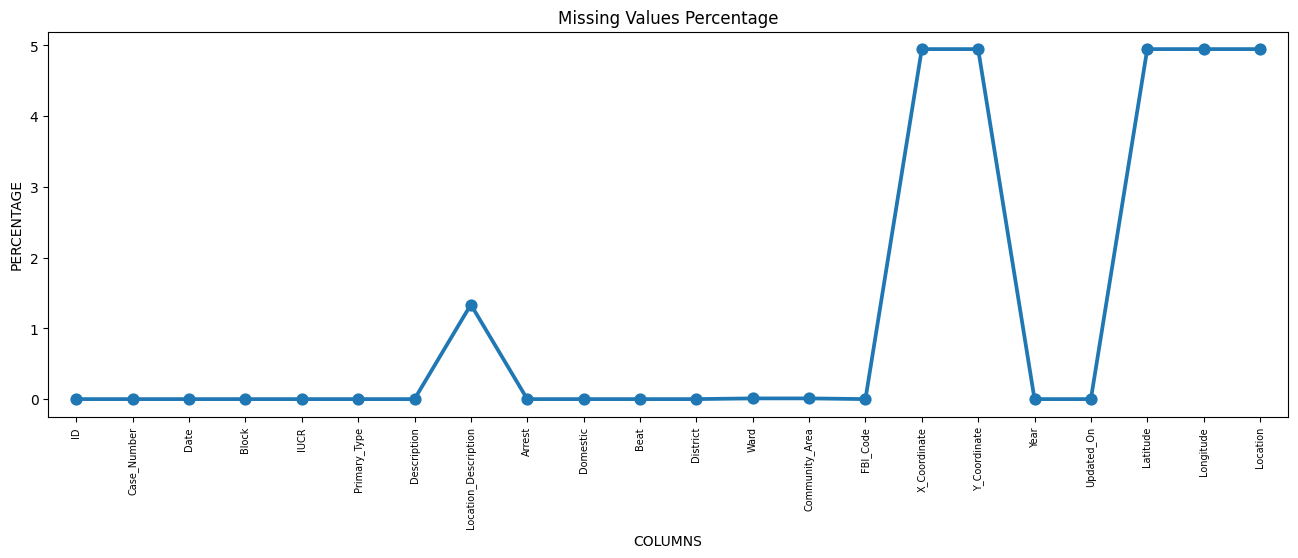

In [12]:
plt.figure(figsize=(16, 5))
missing_values = pd.DataFrame(data.isnull().sum()*100/data.shape[0]).reset_index()
missing_values.columns = ['column_name', 'missing_percentage']
ax = sns.pointplot(x='column_name', y='missing_percentage', data=missing_values)
plt.xticks(rotation=90, fontsize=7)
plt.title('Missing Values Percentage')
plt.ylabel('PERCENTAGE')
plt.xlabel('COLUMNS')
plt.show()

In [13]:
#Checking Duplicate Values
len(data[data.duplicated()])

0

In [14]:
#unique values for each column
data.nunique()

,0
ID,10104
Case_Number,10104
Date,5039
Block,7074
IUCR,200
Primary_Type,26
Description,185
Location_Description,94
Arrest,2
Domestic,2


## Data Visualisation

<ipython-input-4-0280300866a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Primary_Type', data=df, order=df['Primary_Type'].value_counts().index[:10], palette=green_palette)
<ipython-input-4-0280300866a0>:3: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y='Primary_Type', data=df, order=df['Primary_Type'].value_counts().index[:10], palette=green_palette)


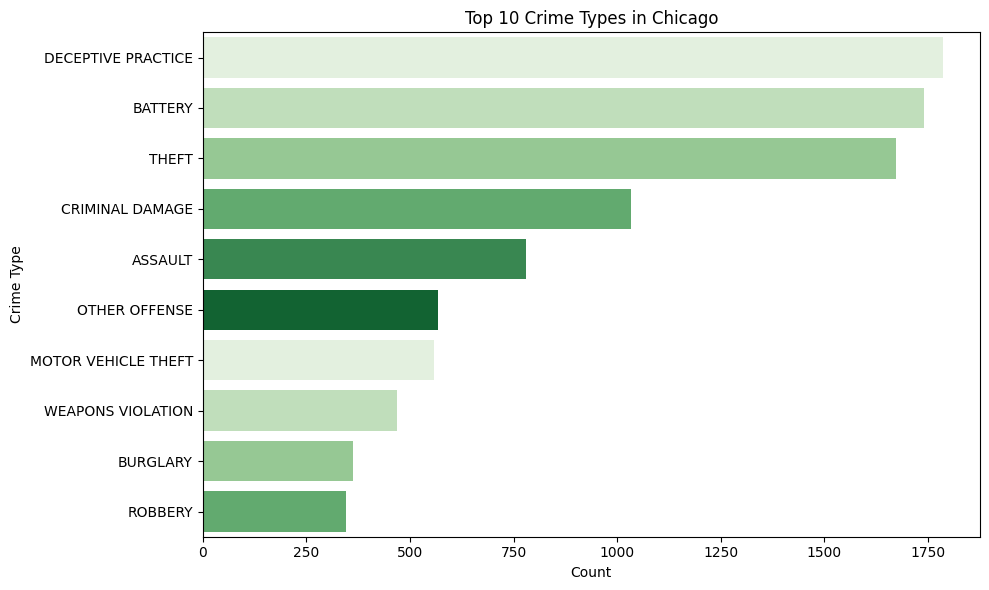

In [4]:
# Step 1: Crime Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Primary_Type', data=df, order=df['Primary_Type'].value_counts().index[:10], palette=green_palette)
plt.title('Top 10 Crime Types in Chicago')
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()

<ipython-input-5-b76d2f46d679>:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data=df[df['Primary_Type'].isin(df['Primary_Type'].value_counts().index[:5])], x='Primary_Type', hue='Arrest', palette=green_palette)


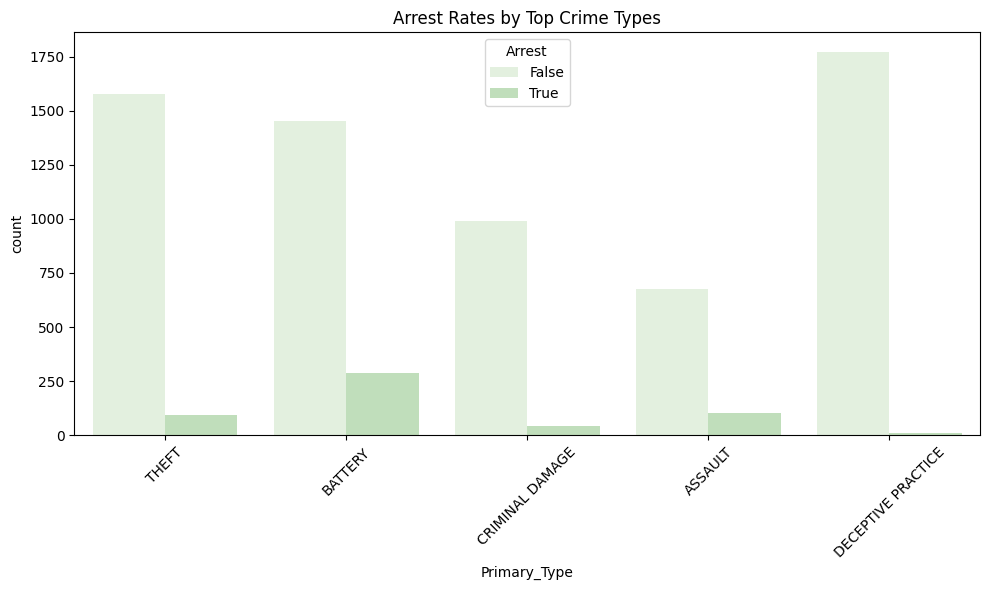

In [5]:
# Step 2: Arrests by Crime Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['Primary_Type'].isin(df['Primary_Type'].value_counts().index[:5])], x='Primary_Type', hue='Arrest', palette=green_palette)
plt.title('Arrest Rates by Top Crime Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-6-5bf0d41aa61b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Location_Description', data=df, order=df['Location_Description'].value_counts().index[:10], palette=green_palette)
<ipython-input-6-5bf0d41aa61b>:3: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y='Location_Description', data=df, order=df['Location_Description'].value_counts().index[:10], palette=green_palette)


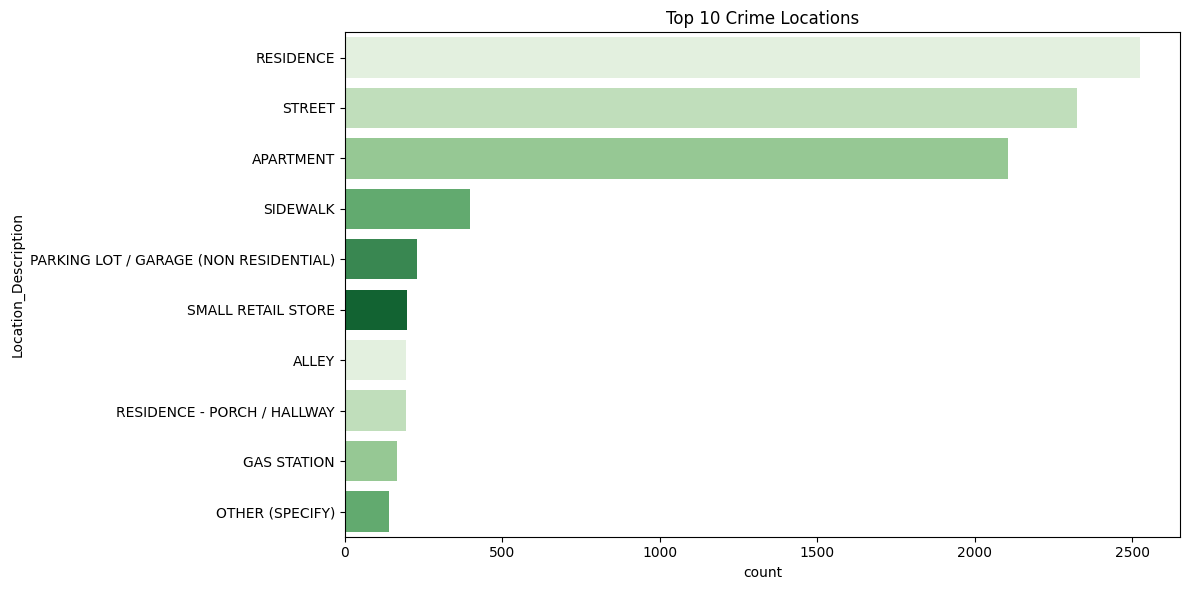

In [6]:
# Step 3: Crime Location Types
plt.figure(figsize=(12, 6))
sns.countplot(y='Location_Description', data=df, order=df['Location_Description'].value_counts().index[:10], palette=green_palette)
plt.title('Top 10 Crime Locations')
plt.tight_layout()
plt.show()

In [7]:
# --- Machine Learning Section ---

# Filter and prepare data
df_ml = df[['Primary_Type', 'Arrest', 'Domestic', 'District', 'Ward']].dropna()

# Encode categorical target
df_ml['Primary_Code'] = df_ml['Primary_Type'].astype('category').cat.codes

X = df_ml[['Arrest', 'Domestic', 'District', 'Ward']].astype(int)
y = df_ml['Primary_Code']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_tree))


Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.14      0.02      0.04       270
           2       0.50      0.69      0.58       504
           3       0.00      0.00      0.00       114
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00       313
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00        38
           8       0.26      0.97      0.41       533
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00       160
          15       0.42      0.63      0.50        90
          17       0.00      0.00      0.00        34
          18       0.00      0.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


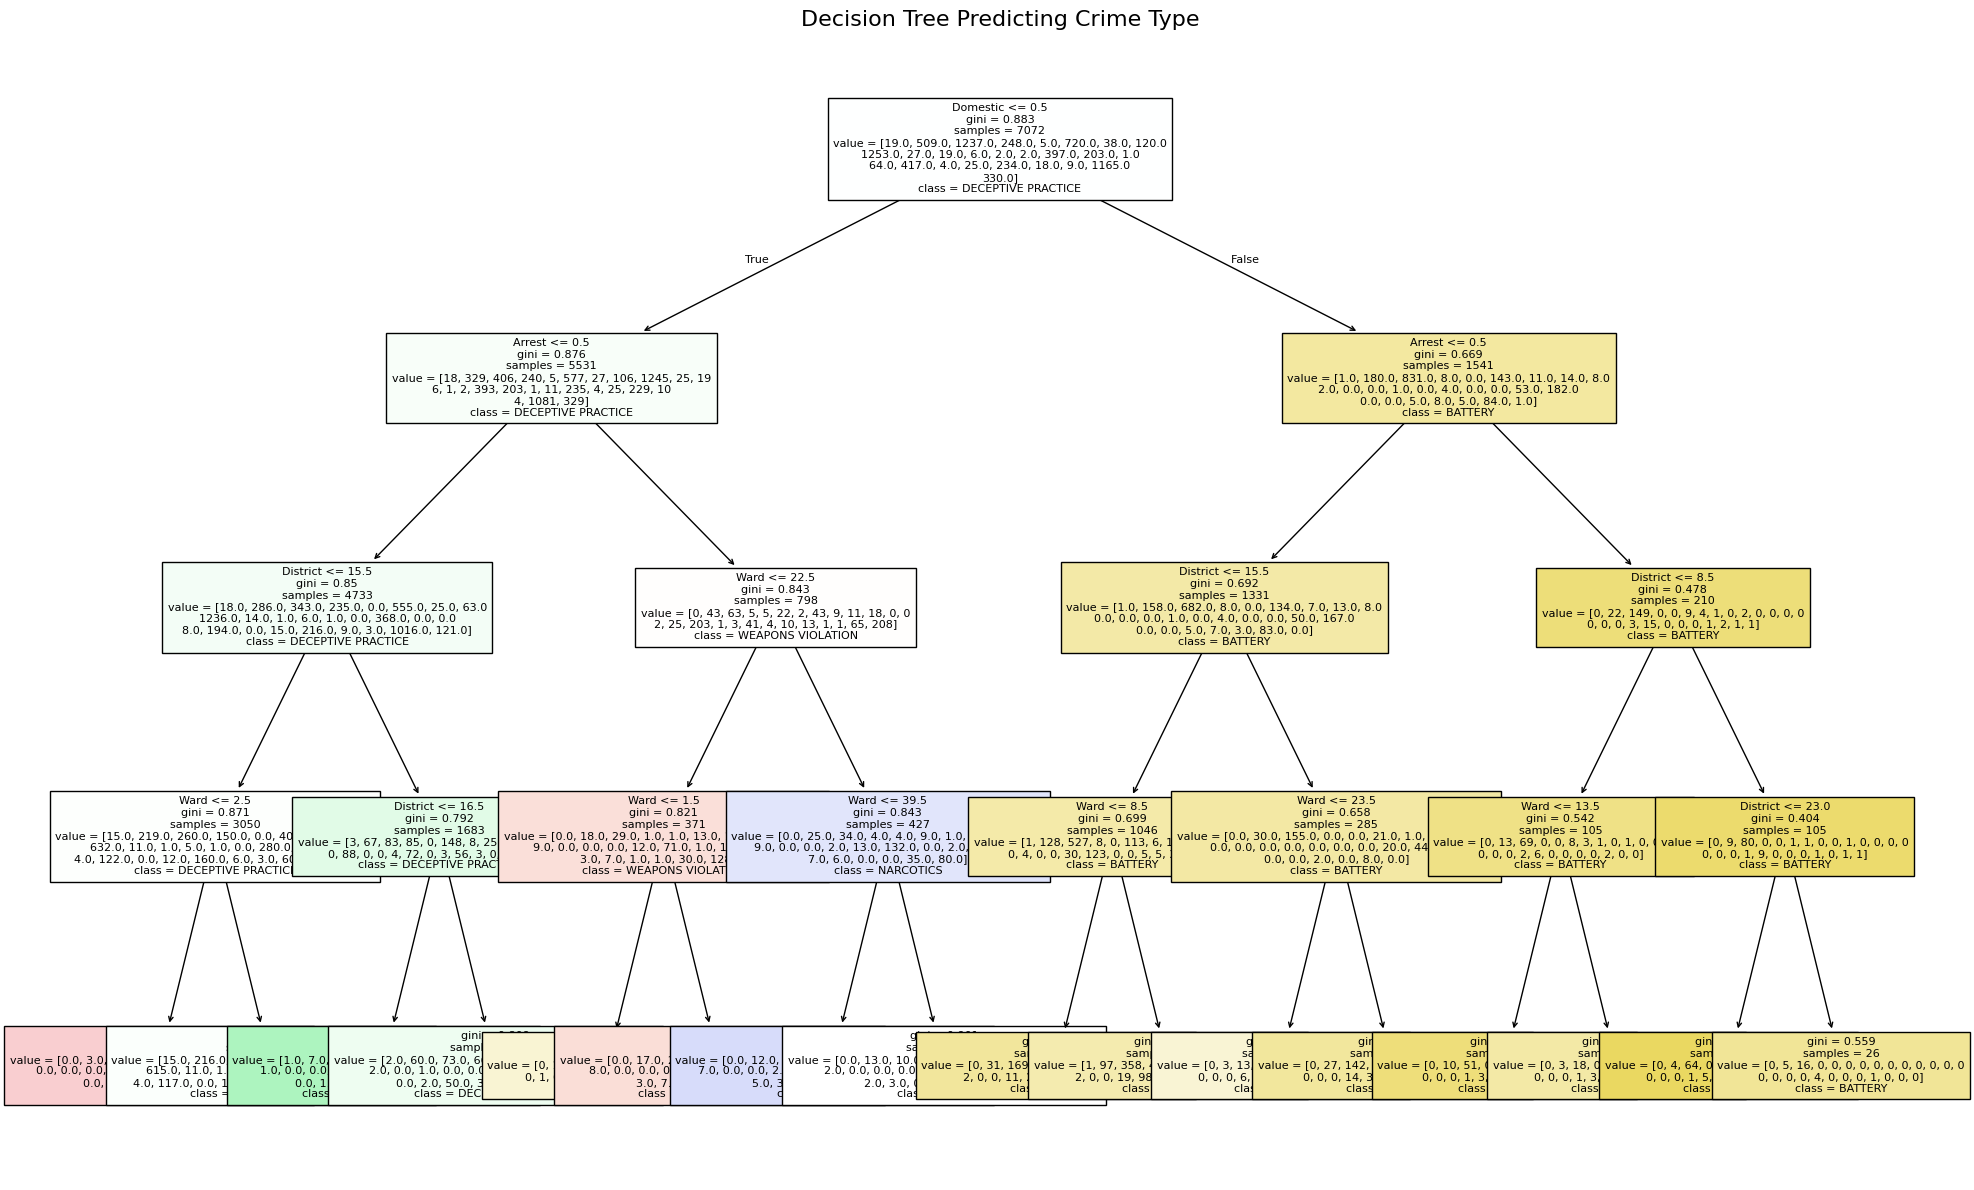

In [11]:
# Plot the decision tree
plt.figure(figsize=(20, 12))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=df_ml['Primary_Type'].astype('category').cat.categories,
    filled=True,
    fontsize=8
)
plt.title('Decision Tree Predicting Crime Type', fontsize=16)
plt.tight_layout()
plt.show()

#### Analysing and finding optimal ccp_alpha by testing several values.

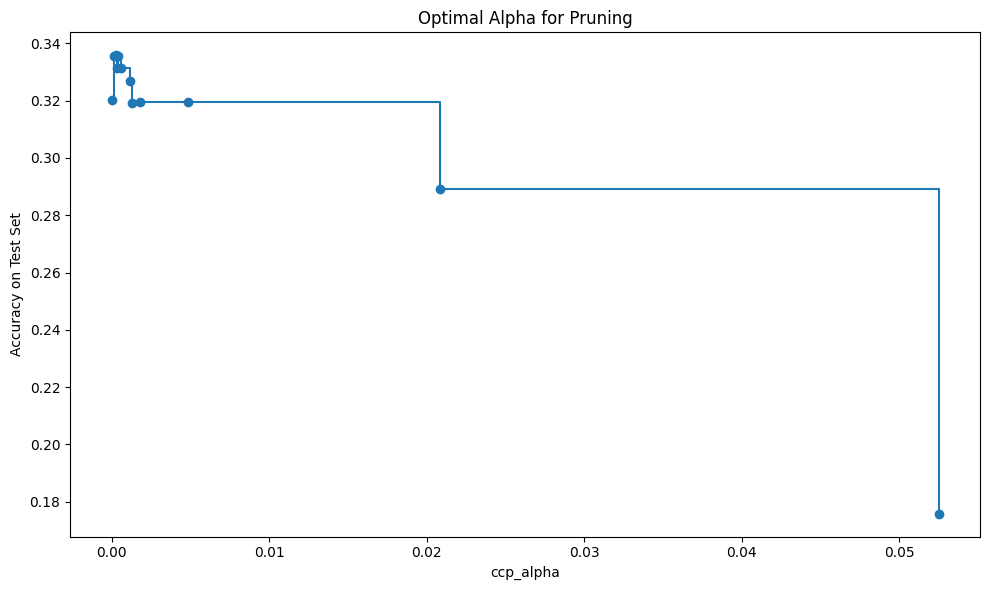

In [12]:
# Step 1: Find effective alphas for pruning
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Step 2: Train trees with different alphas
trees = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    trees.append(clf)

# Step 3: Choose the best alpha based on accuracy
from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in trees]

# Plot alpha vs. accuracy
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, acc_scores, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy on Test Set")
plt.title("Optimal Alpha for Pruning")
plt.tight_layout()
plt.show()


Using **ccp_alpha = 0.02** as pruned model: The graph retains nearly 85% of original accuracy (0.29 vs. 0.3389).

Now, the model is significantly simpler, which:

* Reduces overfitting

* Improves interpretability

* Is faster for predictions

##### Final Pruned Tree Code

Classification Report (Pruned Tree):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00       270
           2       0.50      0.68      0.58       504
           3       0.00      0.00      0.00       114
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00       313
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00        38
           8       0.26      0.99      0.41       533
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00       160
          15       0.00      0.00      0.00        90
          17       0.00      0.00      0.00        34
          18       0.00      0.00      0.00 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


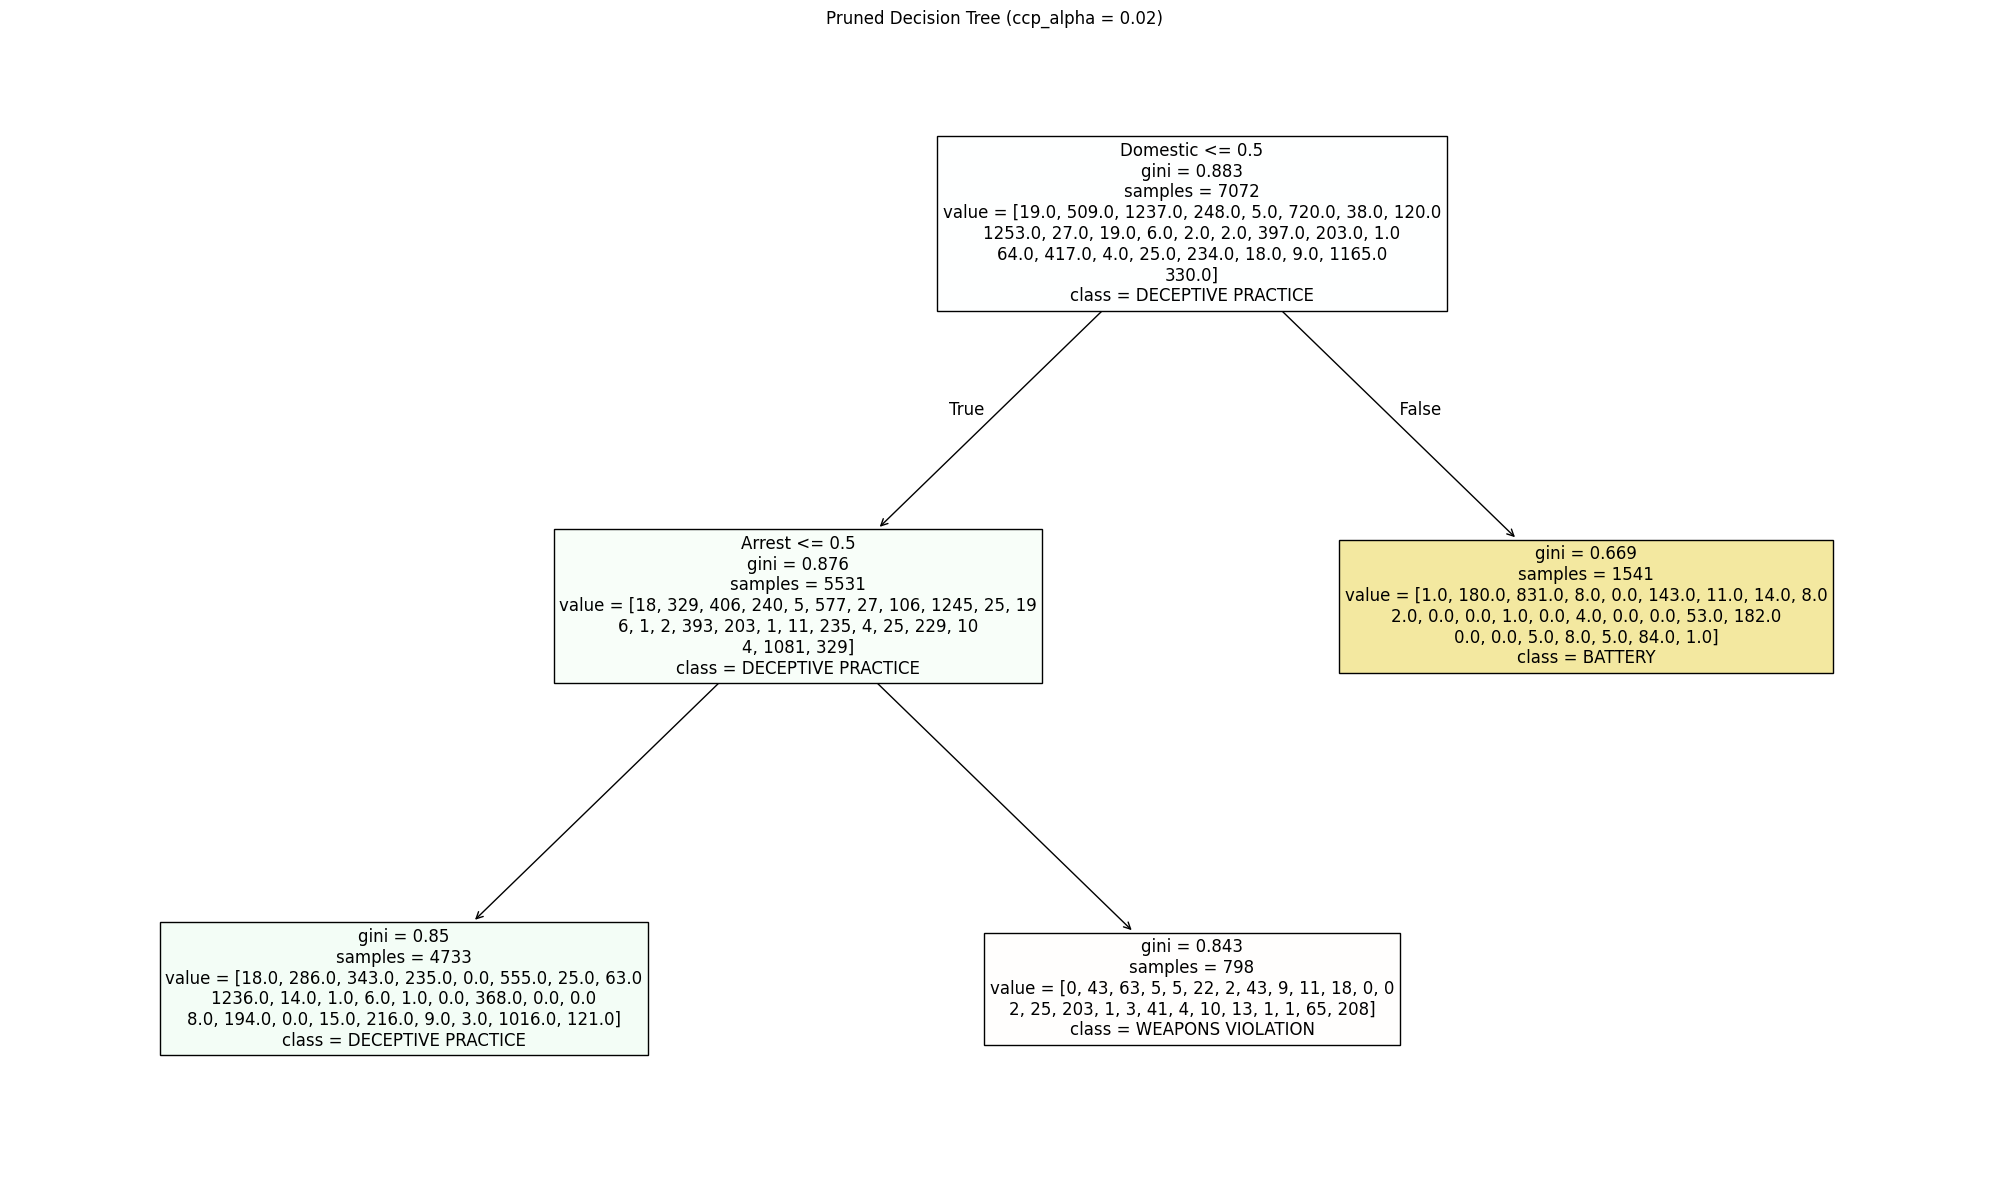

In [13]:
pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=0.02, max_depth=4)
pruned_tree.fit(X_train, y_train)

# Classification report
y_pruned_pred = pruned_tree.predict(X_test)
print("Classification Report (Pruned Tree):")
print(classification_report(y_test, y_pruned_pred))

# Plot
plt.figure(figsize=(20, 12))
plot_tree(
    pruned_tree,
    feature_names=X.columns,
    class_names=df_ml['Primary_Type'].astype('category').cat.categories,
    filled=True,
    fontsize=12
)
plt.title("Pruned Decision Tree (ccp_alpha = 0.02)")
plt.tight_layout()
plt.show()
